#A simplified implementation of Multiclass Text Classification (character by character)



In [0]:
from io import open
import glob
import os

In [0]:
!wget http://download.pytorch.org/tutorial/data.zip

--2020-04-20 20:13:00--  http://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.224.164.82, 13.224.164.43, 13.224.164.78, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.164.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.1s    

2020-04-20 20:13:00 (28.7 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [63]:
print(glob.glob('/content/data/*.txt'))

['/content/data/German.txt', '/content/data/Scottish.txt', '/content/data/Greek.txt', '/content/data/Italian.txt', '/content/data/Spanish.txt', '/content/data/Polish.txt', '/content/data/Chinese.txt', '/content/data/Japanese.txt', '/content/data/Portuguese.txt', '/content/data/Russian.txt', '/content/data/Arabic.txt', '/content/data/Korean.txt', '/content/data/Vietnamese.txt', '/content/data/English.txt', '/content/data/Dutch.txt', '/content/data/Irish.txt', '/content/data/Czech.txt', '/content/data/French.txt']


In [65]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [66]:
n_letters

57

In [0]:
language_names = {}
names = []
all_languages = []

In [0]:
# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
  if unicodedata.category(c) != 'Mn' and c in all_letters)

In [69]:
print(unicodeToAscii('Āryabhaṭa'))

Aryabhata


In [0]:
total_names = 0

for item in glob.glob('/content/data/*.txt'):
  match = os.path.splitext(os.path.basename(item))[0]
  all_languages.append(match)
  read_names = open(item, encoding='utf-8').read().strip().split('\n')
  names = [unicodeToAscii(line) for line in read_names]
  language_names[match] = names
  total_names += len(names)

In [72]:
all_languages

['German',
 'Scottish',
 'Greek',
 'Italian',
 'Spanish',
 'Polish',
 'Chinese',
 'Japanese',
 'Portuguese',
 'Russian',
 'Arabic',
 'Korean',
 'Vietnamese',
 'English',
 'Dutch',
 'Irish',
 'Czech',
 'French']

In [73]:
language_names

{'Arabic': ['Khoury',
  'Nahas',
  'Daher',
  'Gerges',
  'Nazari',
  'Maalouf',
  'Gerges',
  'Naifeh',
  'Guirguis',
  'Baba',
  'Sabbagh',
  'Attia',
  'Tahan',
  'Haddad',
  'Aswad',
  'Najjar',
  'Dagher',
  'Maloof',
  'Isa',
  'Asghar',
  'Nader',
  'Gaber',
  'Abboud',
  'Maalouf',
  'Zogby',
  'Srour',
  'Bahar',
  'Mustafa',
  'Hanania',
  'Daher',
  'Tuma',
  'Nahas',
  'Saliba',
  'Shamoon',
  'Handal',
  'Baba',
  'Amari',
  'Bahar',
  'Atiyeh',
  'Said',
  'Khouri',
  'Tahan',
  'Baba',
  'Mustafa',
  'Guirguis',
  'Sleiman',
  'Seif',
  'Dagher',
  'Bahar',
  'Gaber',
  'Harb',
  'Seif',
  'Asker',
  'Nader',
  'Antar',
  'Awad',
  'Srour',
  'Shadid',
  'Hajjar',
  'Hanania',
  'Kalb',
  'Shadid',
  'Bazzi',
  'Mustafa',
  'Masih',
  'Ghanem',
  'Haddad',
  'Isa',
  'Antoun',
  'Sarraf',
  'Sleiman',
  'Dagher',
  'Najjar',
  'Malouf',
  'Nahas',
  'Naser',
  'Saliba',
  'Shamon',
  'Malouf',
  'Kalb',
  'Daher',
  'Maalouf',
  'Wasem',
  'Kanaan',
  'Naifeh',
  'Boutro

In [75]:
total_names

20074

In [0]:
import torch

In [0]:
def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][all_letters.find(letter)] = 1
  return tensor

In [78]:
letterToTensor('p')

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [0]:
def nameToTensor(name):
  tensor = torch.zeros(len(name), 1, n_letters)
  for li, letter in enumerate(name):
    tensor[li][0][all_letters.find(letter)] = 1

  return tensor

`li` holds index of that character in the name.

In [83]:
pytorch = nameToTensor('pytorch')
pytorch

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [0]:
n_languages = 18

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 512
rnn = RNN(n_letters, n_hidden, n_languages)

[Visual-aid](https://imgur.com/Z2xbySO)

In [91]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

output.size()

torch.Size([1, 18])

In [92]:
next_hidden.size()

torch.Size([1, 512])

In [130]:
input = nameToTensor('Czajkowski')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)

output.size()

torch.Size([1, 18])

In [132]:
def languageFromOutput(output):
    _, top_i = output.topk(1)
    language_i = top_i[0].item()
    return all_languages[language_i],   language_i

print(languageFromOutput(output))

('Italian', 3)


In [141]:
import random

def randomTrainingExample():
    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]
    random_language_names = language_names[language]
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return language, name, language_tensor, name_tensor

# Checking the helper fn.
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    print('languages =', language, '; line =', name)

languages = Italian ; line = Montanari
languages = French ; line = Eustis
languages = Vietnamese ; line = Quach
languages = Vietnamese ; line = Tieu
languages = French ; line = Sauvageot
languages = Japanese ; line = Okumura
languages = Polish ; line = Marek
languages = Irish ; line = Peatain
languages = Japanese ; line = Katsu
languages = Vietnamese ; line = Quach


In [0]:
criterion = nn.NLLLoss()
learning_rate = 0.003

In [0]:
def train(language_tensor, name_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, language_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [0]:
n_iters = 200000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

In [146]:
for epoch in range(1, n_iters + 1):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % print_every == 0:
        guess, guess_i = languageFromOutput(output)
        correct = '✓' if guess == language else '✗ (%s)' % language
        print('%d %d%%  %.4f %s / %s %s' % (epoch, epoch / n_iters * 100, loss, name, guess, correct))

    if epoch % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 2%  2.2398 Cabral / Irish ✗ (Portuguese)
10000 5%  2.6589 Froy / Korean ✗ (English)
15000 7%  0.8963 Zong / Chinese ✓
20000 10%  1.7750 Vazquez / Spanish ✓
25000 12%  1.5731 Esparza / Spanish ✓
30000 15%  0.8749 Kwong / Chinese ✓
35000 17%  1.5073 Tso / Vietnamese ✗ (Chinese)
40000 20%  1.5184 Batsev / Arabic ✗ (Russian)
45000 22%  1.2142 Ventura / Portuguese ✓
50000 25%  0.3163 Sowka / Polish ✓
55000 27%  0.9592 Pang / Chinese ✓
60000 30%  1.8294 Weineltk / Czech ✓
65000 32%  1.1793 Yun / Chinese ✗ (Korean)
70000 35%  0.2214 Tong / Vietnamese ✓
75000 37%  3.5577 Naizer / Arabic ✗ (Czech)
80000 40%  0.6460 Dehmel / Czech ✓
85000 42%  0.4013 Fujimoto / Japanese ✓
90000 45%  1.4242 Mifsud / Scottish ✗ (Arabic)
95000 47%  1.5091 Polites / Dutch ✗ (Greek)
100000 50%  0.8749 Armati / Italian ✓
105000 52%  1.3303 Lorenzen / German ✓
110000 55%  0.1450 Xing / Chinese ✓
115000 57%  0.5967 Pho / Vietnamese ✓
120000 60%  0.6414 Antar / Arabic ✓
125000 62%  4.3619 Oorschot / Greek ✗ (Dutch)


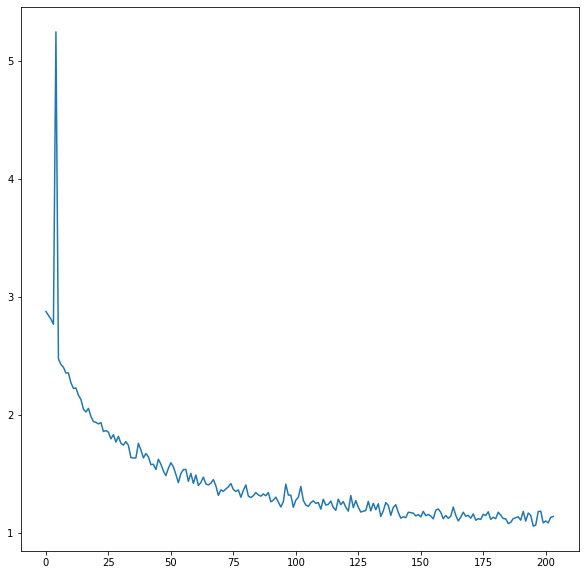

In [150]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize = (10, 10))
plt.plot(all_losses)

In [0]:
n_predictions = 3

In [0]:
def predict(input_name, n_predictions=3):
    print('\n> %s' % input_name)
    with torch.no_grad():
        name_tensor = nameToTensor(input_name)
        hidden = rnn.initHidden()
        for i in range(name_tensor.size()[0]):
            output, hidden = rnn(name_tensor[i], hidden)
        topv, topi = output.topk(n_predictions, 1, True)

        for i in range(n_predictions):
            value = topv[0][i].item()
            language_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_languages[language_index]))

In [162]:
predict('Hamel')


> Hamel
(-0.79) Czech
(-1.21) German
(-2.43) Dutch


In [163]:
predict('Bashar')


> Bashar
(-0.19) Arabic
(-2.86) German
(-3.64) French


In [164]:
predict('Akutagawa')


> Akutagawa
(-0.03) Japanese
(-4.13) Polish
(-5.41) Russian


In [166]:
predict('Lamour')


> Lamour
(-0.70) French
(-1.04) German
(-3.10) Czech


In [167]:
predict('Natalie')


> Natalie
(-0.74) French
(-1.71) Italian
(-2.09) Greek


In [168]:
predict('Kuchensky')


> Kuchensky
(-1.12) Czech
(-1.13) Russian
(-1.96) German


In [170]:
predict('Nyla')


> Nyla
(-1.48) Irish
(-1.98) Spanish
(-2.09) Korean


In [171]:
predict('Seung')


> Seung
(-1.39) Chinese
(-1.78) German
(-2.06) Dutch
